In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv("../Data/England/E0_16.csv")
df_14 = pd.read_csv("../Data/England/E0_14.csv")

In [3]:
df.columns

Index([u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG', u'FTAG', u'FTR',
       u'HTHG', u'HTAG', u'HTR', u'Referee', u'HS', u'AS', u'HST', u'AST',
       u'HF', u'AF', u'HC', u'AC', u'HY', u'AY', u'HR', u'AR', u'B365H',
       u'B365D', u'B365A', u'BWH', u'BWD', u'BWA', u'IWH', u'IWD', u'IWA',
       u'LBH', u'LBD', u'LBA', u'PSH', u'PSD', u'PSA', u'WHH', u'WHD', u'WHA',
       u'VCH', u'VCD', u'VCA', u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD',
       u'BbAvD', u'BbMxA', u'BbAvA', u'BbOU', u'BbMx>2.5', u'BbAv>2.5',
       u'BbMx<2.5', u'BbAv<2.5', u'BbAH', u'BbAHh', u'BbMxAHH', u'BbAvAHH',
       u'BbMxAHA', u'BbAvAHA', u'PSCH', u'PSCD', u'PSCA'],
      dtype='object')

### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [4]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
res_14 = df_14.ix[:,:23]
res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

In [5]:
res_16.head()
feature_table = df.ix[:,:23]

In [6]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
235,Tottenham,Middlesbrough,1,0,H,0,0,D,M Clattenburg,17,...,5,0,8,11,11,2,0,1,0,0
236,Watford,Burnley,2,1,H,2,0,H,M Oliver,16,...,7,7,12,10,3,6,5,0,0,1
237,West Brom,Stoke,1,0,H,1,0,H,K Friend,16,...,4,2,6,13,5,6,2,2,0,0
238,Leicester,Man United,0,3,A,0,2,A,A Taylor,11,...,1,9,12,13,10,3,2,4,0,0
239,Man City,Swansea,2,1,H,1,0,H,M Dean,17,...,5,2,9,13,10,3,2,3,0,0


In [7]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))

In [8]:
res_16.shape[0]

240

In [9]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print "Average number of goals at home",avg_home_scored_16
print "Average number of goals away", avg_away_scored_16
print "Average number of goals conceded at home",avg_away_conceded_16
print "Average number of goals conceded away",avg_home_conceded_16

Average number of goals at home 1.60416666667
Average number of goals away 1.24166666667
Average number of goals conceded at home 1.60416666667
Average number of goals conceded away 1.24166666667


In [10]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [11]:
# list(res_home)[0]

In [12]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,24,28,NaN,NaN,13,15,NaN,NaN
1,Bournemouth,21,14,NaN,NaN,19,28,NaN,NaN
2,Burnley,21,5,NaN,NaN,11,24,NaN,NaN
3,Chelsea,33,18,NaN,NaN,7,10,NaN,NaN
4,Crystal Palace,13,19,NaN,NaN,20,25,NaN,NaN
5,Everton,25,15,NaN,NaN,10,17,NaN,NaN
6,Hull,16,6,NaN,NaN,21,26,NaN,NaN
7,Leicester,16,8,NaN,NaN,16,25,NaN,NaN
8,Liverpool,29,23,NaN,NaN,11,19,NaN,NaN
9,Man City,23,26,NaN,NaN,13,16,NaN,NaN


In [13]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [14]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16.head()

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,24,28,1.246753,1.879195,13,15,0.872483,0.779221
1,Bournemouth,21,14,1.090909,0.939597,19,28,1.275168,1.454545
2,Burnley,21,5,1.090909,0.335570,11,24,0.738255,1.246753
3,Chelsea,33,18,1.714286,1.208054,7,10,0.469799,0.519481
4,Crystal Palace,13,19,0.675325,1.275168,20,25,1.342282,1.298701


In [15]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [16]:
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Burnley,Swansea,A,3,9,1.090909,0.738255,0.335570,1.246753
1,Crystal Palace,West Brom,A,4,3,0.675325,1.342282,1.275168,1.298701
2,Everton,Tottenham,D,6,4,1.298701,0.671141,1.006711,0.883117
3,Hull,Leicester,H,5,5,0.831169,1.409396,0.402685,1.350649
4,Man City,Sunderland,H,4,3,1.194805,0.872483,1.744966,0.831169


In [17]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [18]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [19]:
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
230,Chelsea,Arsenal,H,6,5,1.714286,0.469799,1.208054,0.519481,1
231,Crystal Palace,Sunderland,A,9,7,0.675325,1.342282,1.275168,1.298701,-1
232,Everton,Bournemouth,H,10,8,1.298701,0.671141,1.006711,0.883117,1
233,Hull,Liverpool,H,4,5,0.831169,1.409396,0.402685,1.350649,1
234,Southampton,West Ham,A,7,4,0.727273,0.939597,0.671141,0.883117,-1
235,Tottenham,Middlesbrough,H,5,0,1.350649,0.335570,1.342282,0.571429,1
236,Watford,Burnley,H,7,7,0.883117,1.208054,0.805369,1.142857,1
237,West Brom,Stoke,H,4,2,1.142857,0.939597,0.671141,0.779221,1
238,Leicester,Man United,A,1,9,0.831169,1.073826,0.536913,1.298701,-1
239,Man City,Swansea,H,5,2,1.194805,0.872483,1.744966,0.831169,1


In [20]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [77]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [78]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.26086957  0.30434783  0.39130435  0.47826087  0.43478261  0.27272727
  0.38095238  0.47619048  0.47619048  0.57142857]
0.404705439488


In [23]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.48        0.44        0.44        0.52        0.44        0.52173913
  0.56521739  0.47826087  0.52173913  0.39130435]
0.479826086957


In [24]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.6         0.6         0.56        0.56        0.68        0.56521739
  0.7826087   0.69565217  0.60869565  0.56521739]
0.621739130435


In [25]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.44        0.48        0.6         0.44        0.52        0.52173913
  0.69565217  0.52173913  0.60869565  0.56521739]
0.539304347826


## Adding Recent Performance

In [26]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [27]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [28]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Arsenal','Hull','D',0,0,0,0,0,0],
                             ['Stoke','Crystal Palace','D',0,0,0,0,0,0],
                             ['Man United','Watford','D',0,0,0,0,0,0],
                             ['Middlesbrough','Everton','D',0,0,0,0,0,0],
                             ['West Ham','West Brom','D',0,0,0,0,0,0],
                             ['Sunderland','Southampton','D',0,0,0,0,0,0],
                             ['Liverpool','Tottenham','D',0,0,0,0,0,0],
                             ['Burnley','Chelsea','D',0,0,0,0,0,0],
                             ['Swansea','Leicester','D',0,0,0,0,0,0],
                             ['Bournemouth','Man City','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [29]:
#del new_feat_table

In [30]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(250, 9)

In [31]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [32]:
feat_table.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
249,Arsenal,Hull,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
248,Stoke,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
247,Man United,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
246,Middlesbrough,Everton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
245,West Ham,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [56]:
# Adding k recent performance metrics. Change value of k.
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [57]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [58]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [94]:
# num_games decides the train-test split
print feat_table.shape
num_games = feat_table.shape[0]-20
num_games

(250, 19)


230

In [95]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [96]:
### Try predictions here too.

# Adding home advantage

In [97]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [98]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games
v_split = 20
n_games = num_games - v_split

In [99]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [100]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [129]:
#KNN
plot_scores_knn = []
for b in xrange(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_xgb = []
for i in xrange(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_xgb.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


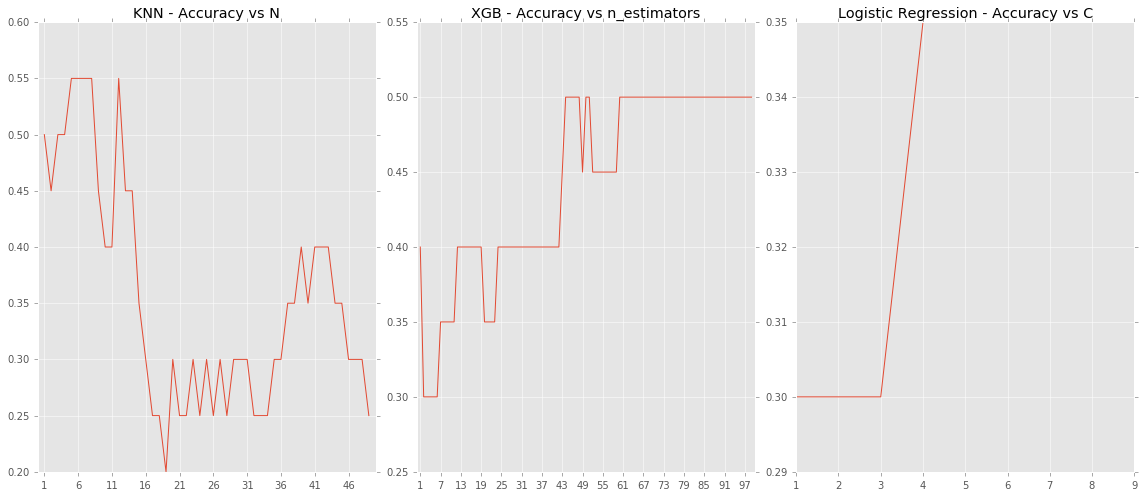

In [130]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(xrange(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(xrange(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(xrange(1,100),plot_scores_xgb);
ax2.set_xticks(xrange(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(xrange(1,10),plot_scores_logreg);
ax3.set_xticks(xrange(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [131]:
clf_knn = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=16).fit(X_train,y_train)

In [132]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)

In [133]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB

In [134]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB
230,Chelsea,Arsenal,1,1
231,Crystal Palace,Sunderland,-1,-1
232,Everton,Bournemouth,1,1
233,Hull,Liverpool,0,1
234,Southampton,West Ham,1,-1
235,Tottenham,Middlesbrough,1,1
236,Watford,Burnley,1,-1
237,West Brom,Stoke,0,1
238,Leicester,Man United,-1,1
239,Man City,Swansea,1,1


In [135]:
def transformknnResultBack(row):
    if(row.Result_knn == 1):
        return 'H'
    elif(row.Result_knn == -1):
        return 'A'
    else:
        return 'D'
    
def transformXGBResultBack(row):
    if(row.Result_XGB == 1):
        return 'H'
    elif(row.Result_XGB == -1):
        return 'A'
    else:
        return 'D'


In [136]:
this_week["Res_knn"] = this_week.apply(lambda row: transformknnResultBack(row),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformXGBResultBack(row),axis=1)
this_week.drop(["Result_knn", "Result_XGB"],axis=1,inplace=True)

In [137]:
this_week

,HomeTeam,AwayTeam,Res_knn,Res_XGB
230,Chelsea,Arsenal,H,H
231,Crystal Palace,Sunderland,A,A
232,Everton,Bournemouth,H,H
233,Hull,Liverpool,D,H
234,Southampton,West Ham,H,A
235,Tottenham,Middlesbrough,H,H
236,Watford,Burnley,H,A
237,West Brom,Stoke,D,H
238,Leicester,Man United,A,H
239,Man City,Swansea,H,H


Yes. Burnley. 